Static method: 

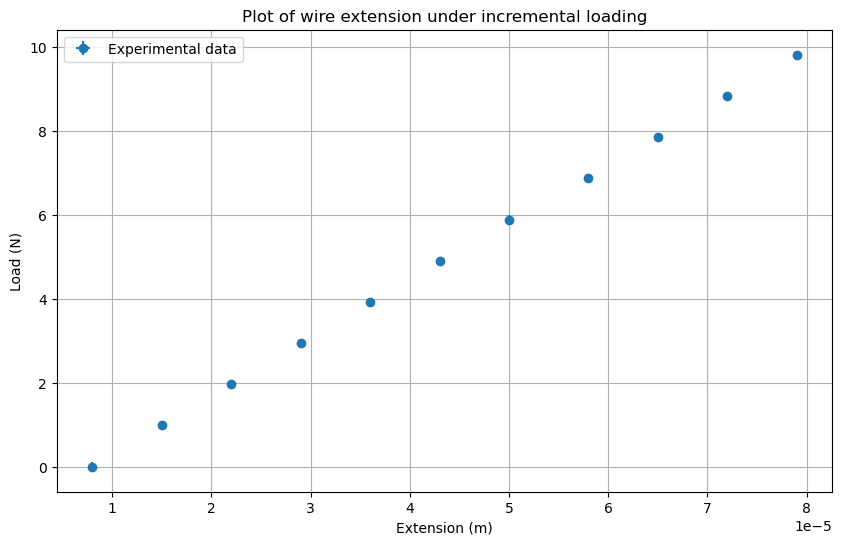

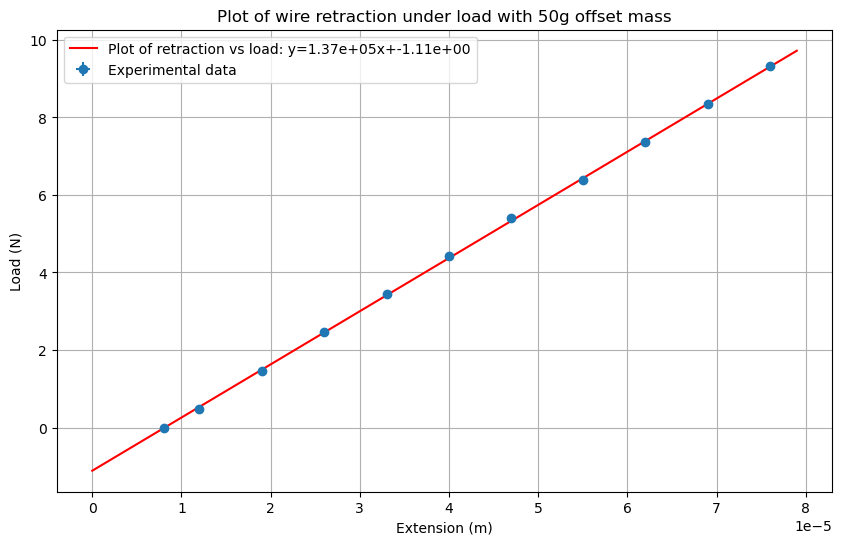

Slope difference:  491.84293975669425 
R-value 1:  [0.12027054] R-value 2:  [0.11273816]


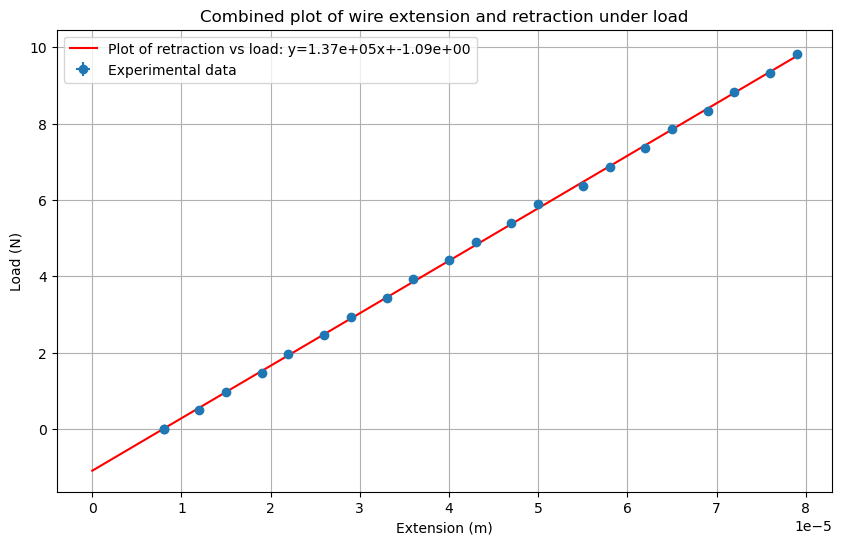

In [5]:
import numpy as np
import matplotlib.pyplot as plt

massrange_1 = np.array([                   

            0 ,

            100 , 

            200 ,

            300 ,

            400 ,

            500 ,

            600 ,

            700 ,

            800 ,

            900 ,

            1000      

            ])

err_massrange_1 = 0.01
# extension as mass increases
disp_1 = np.array([
    
        8 ,

        15 ,

        22 ,

        29 ,

        36 ,

        43 ,

        50 ,

        58 ,

        65 ,

        72 ,

        79 

        ])

disp_1_err = 1e-6 
#retraction as mass in removed
disp_2 = np.array([
    
        76 ,

        69 ,

        62 ,

        55 ,

        47 ,

        40 ,

        33 ,

        26 ,

        19 ,

        12 ,

        8 

        ])

massrange_2 = np.array([
    
                950 ,

                850 ,

                750 ,

                650 ,

                550 ,

                450 ,

                350 ,

                250 ,

                150 ,

                50 ,

                0 

                ])


disp_3 = np.append(disp_1, disp_2)
mass_3 = np.append(massrange_1, massrange_2)

wire1_diam = 0.53e-3
err_wire1_diam = 0.01e-3
L_0 = 2.83

ext1 = (disp_1*1e-6) 
ext2 = (disp_2*1e-6) 
ext3 = (disp_3*1e-6) 
load1 = (massrange_1*9.81) / 1e+3
load2 = (massrange_2*9.81) / 1e+3
load3 = (mass_3*9.81) / 1e+3

err_ext = (1/1e6)*disp_1_err
err_load = err_massrange_1*9.8

xs = np.linspace(0,max(ext3), num=100)
coeffs_1, R1, _, _, _ = np.polyfit(ext1, load1, 1, full=True)
m = coeffs_1[0]
b = coeffs_1[1]

plt.figure(figsize=(10,6))#plt.plot(xs, (m*xs)+b, 'r', label = f'Plot of extension vs load: y={m:.2e}x+{b:.2e}')
plt.errorbar(ext1, load1, yerr = err_load, xerr = err_ext , fmt = 'o', label='Experimental data')
plt.grid(True)
plt.ylabel('Load (N)')
plt.xlabel('Extension (m)')
plt.title("Plot of wire extension under incremental loading")
plt.legend(loc = 'best')
plt.show()

coeffs_2, R2, _, _, _ = np.polyfit(ext2, load2, 1, full=True)
n = coeffs_2[0]
c = coeffs_2[1]

plt.figure(figsize=(10,6))
plt.plot(xs, (n*xs)+c, 'r', label = f'Plot of retraction vs load: y={n:.2e}x+{c:.2e}')
plt.errorbar(ext2, load2, yerr = err_load, xerr = err_ext , fmt = 'o', label='Experimental data')
plt.grid(True)
plt.ylabel('Load (N)')
plt.xlabel('Extension (m)')
plt.title("Plot of wire retraction under load with 50g offset mass")
plt.legend(loc = 'best')
plt.show()

print ("Slope difference: ", abs(m - n), "\nR-value 1: ", np.sqrt(R1), "R-value 2: ", np.sqrt(R2))


coeffs_3, R3, _, _, _ = np.polyfit(ext3, load3, 1, full=True)
a = coeffs_3[0]
k = coeffs_3[1]

plt.figure(figsize=(10,6))
plt.plot(xs, (a*xs)+k, 'r', label = f'Plot of retraction vs load: y={a:.2e}x+{k:.2e}')
plt.errorbar(ext3, load3, yerr = err_load, xerr = err_ext , fmt = 'o', label='Experimental data')
plt.grid(True)
plt.ylabel('Load (N)')
plt.xlabel('Extension (m)')
plt.title("Combined plot of wire extension and retraction under load")
plt.legend(loc = 'best')
plt.show()

E = (L_0 / wire1_diam)*a